<a href="https://colab.research.google.com/github/zzaeyun/ESAA22-2/blob/main/Do_it_pandas_81to119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04-1 데이터 시각화가 필요한 이유**

앤스콤 4분할 그래프 살펴보기: 앤스콤이 지적한 함정과 데이터 시각화의 필요성

데이터는 4개의 그룹으로 구성, 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같음

: 이때 이런 결과만 보고 네개의 데이터 그룹이 같다고 착각할 수 있음 → 앤스콤이 지적한 '함정'

하지만 각 데이터 그룹을 시각화하면 데이터 그룹이 서로 다른 패턴을 가지고 있음을 알 수 있다.

그러므로 데이터 시가고하는 아주 중요한 요소이다.



---


### **앤스콤 데이터 집합을 불러온 후 그래프 그리기**

**1. 앤스콤 데이터 집합 불러오기**

seaborn 라이브러리의 load_dataset 메서드 사용

In [196]:
import seaborn as sns

anscombe=sns.load_dataset('anscombe')
print(anscombe.head())
print(type(anscombe))

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
<class 'pandas.core.frame.DataFrame'>


**2. matplotlib 라이브러리로 그래프 그리기**

In [197]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

3. 열에서 데이터 값이 1인 것만 추출 (첫번째 데이터 그룹)

In [198]:
dataset_1=anscombe[anscombe['dataset']=='I']

4. 선그래프

x, y열에 dataset_1

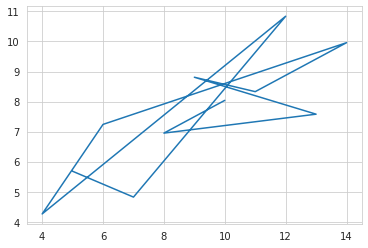

In [199]:
plt.plot(dataset_1['x'],dataset_1['y'])

5. default가 선, 점으로 그리려면 세번째 인자에 입력

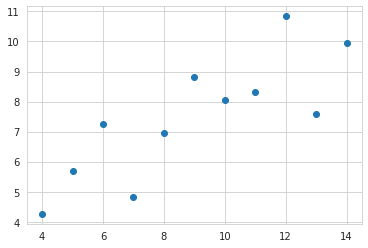

In [200]:
plt.plot(dataset_1['x'],dataset_1['y'],'o')

한 번에 4개의 그래프 그리기 

In [201]:
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']

In [202]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [203]:
axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

In [204]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

In [205]:
axes1.set_title('datset_1')
axes2.set_title('datset_2')
axes3.set_title('datset_3')
axes4.set_title('datset_4')

Text(0.5, 1.0, 'datset_4')

In [206]:
fig.suptitle('anscombe Data')

Text(0.5, 0.98, 'anscombe Data')

In [207]:
fig.tight_layout()

# **04-2 matplotlib 라이브러리 자유자재로 사용하기**



---
기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프


In [208]:
tips=sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


히스토그램: 열 데이터의 분포와 빈도 살펴보는 용도, 일변량 그래프

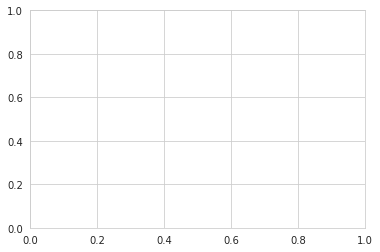

In [209]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)

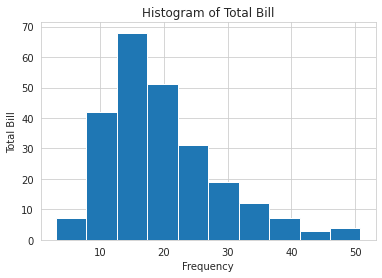

In [210]:
axes1.hist(tips['total_bill'],bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

산점도 그래프: 변수 2개 사용, 이변량 그래프

Text(0, 0.5, 'Tip')

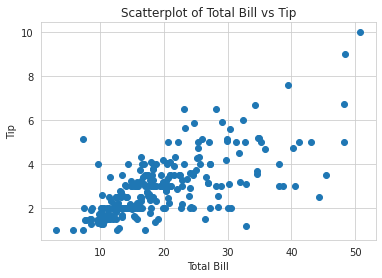

In [211]:
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

박스 그래프: 이산형과 연속형 변수를 함께 사용

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Tips by Sex')

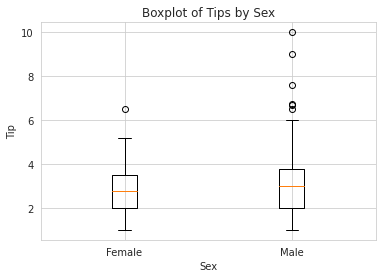

In [212]:
boxplot=plt.figure()
axes1=boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex']=='Female']['tip'],
              tips[tips['sex']=='Male']['tip']],
               labels=['Female','Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

**다변량 그래프 그리기**

다변량 그패프: 3개 이상의 변수를 사용한 그래프

다변량 그래프가 필요한 이유
- 지불 금액과 팁을 사용하여 그린 산점도에서 성별을 추가하여 표현, 점을 다른 색으로 표현
- 식사 비용도 위에 추가한다면 점의 크기를 다르게 표현
- 이렇듯 그래프 요소를 추가하여 그래프 표현


**다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프**

In [213]:
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

In [214]:
tips['sex_color']=tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

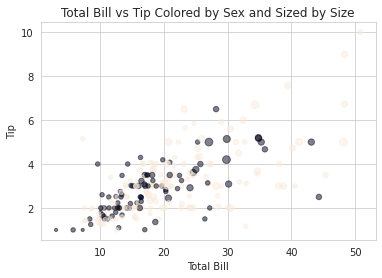

In [215]:
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5
)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# **04-3 seaborn 라이브러리 자유자재로 사용하기**



---

단변량 그래프 그리기 - 히스토 그램

In [216]:
import seaborn as sns

tips=sns.load_dataset('tips')

히스토그램 그리기: subplots distplot 메서드 사용
subplots로 기본틀, distplot에 열 데이터 전달하면 히스토그램

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

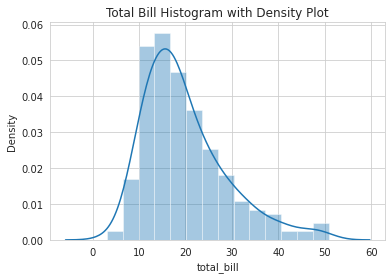

In [217]:
ax=plt.subplots()
ax=sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

히스토그램에서 밀집도 그래프 제외 하려면 

kde=False

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

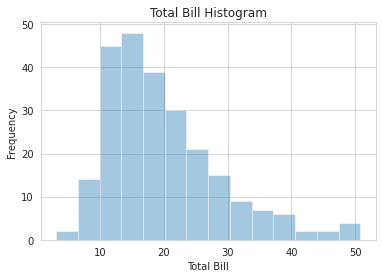

In [218]:
ax=plt.subplots()
ax=sns.distplot(tips['total_bill'],kde=False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

밀집도 그래프만

hist=False

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

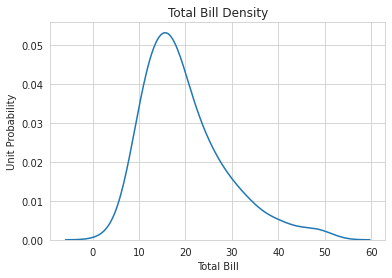

In [219]:
ax=plt.subplots()
ax=sns.distplot(tips['total_bill'],hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

히스토그램+밀집도+양탄자 그래프

distplot에 rug인자를 추가

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

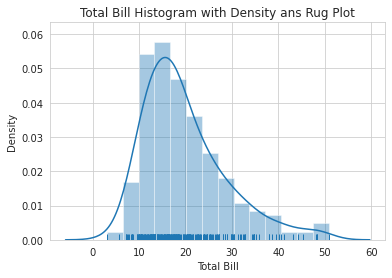

In [220]:
ax=plt.subplots()
ax=sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density ans Rug Plot')
ax.set_xlabel('Total Bill')

count 그래프: 이산값

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

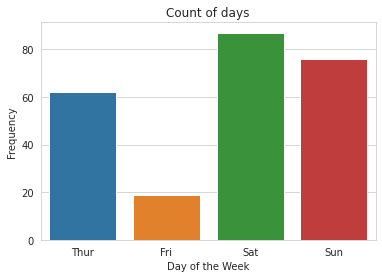

In [221]:
ax=plt.subplots()
ax=sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

**다양한 종류의 이변량 그래프 그리기**

1. seaborn 라이브러리로 산점도 그래프 그리기: replot 메서드를 사용하면 산점도와 회귀선을 함께 

만약 회귀선을 제거하려면 fit_reg=False

Text(0, 0.5, 'Tip')

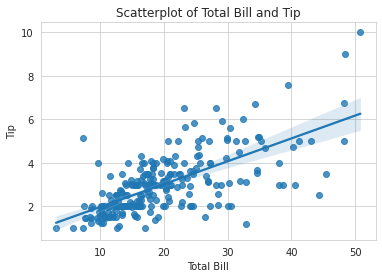

In [222]:
ax=plt.subplots()
ax=sns.regplot(x='total_bill', y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

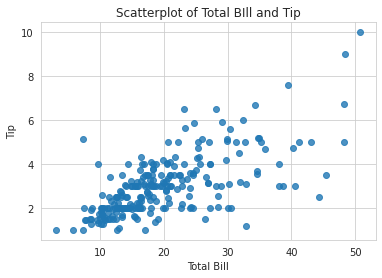

In [223]:
ax=plt.subplots()
ax=sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total BIll and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

2. 산점도 그래프와 히스토그램을 한 번에 그리기: jointplot 메서드

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

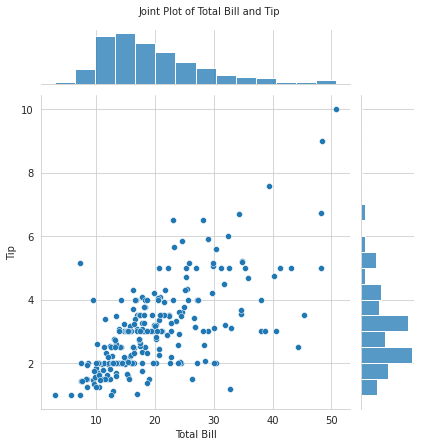

In [224]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

3. 산점도 그래프에서 점이 겹치는 경우 구분하기 어려우므로 육각 그래프를 사용

육각 그래프: 2차원 표면에 육각형으로 데이터를 쌓아 표현: 특정 데이터의 개수가 맣아지면 점점 진한색으로 표현

jointplot 메서드에 kind 인잣값을 hex: kind='hex'

Text(0.5, 1.03, 'Hexbin Joint Plot of Total BIll and Tip')

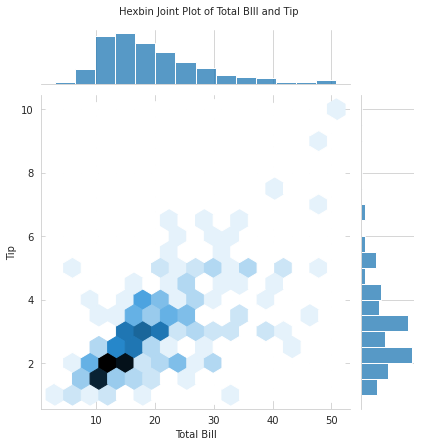

In [225]:
hexbin=sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total BIll and Tip', fontsize=10, y=1.03)

4. 이차원 밀집도 그리기: kdeplot 메서드

shade=True로 지정하면 음영 효과

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

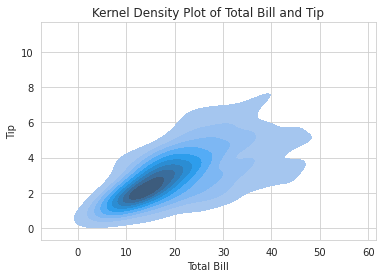

In [226]:
ax=plt.subplots()
ax=sns.kdeplot(data=tips['total_bill'],
               data2=tips['tip'],
               shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

5. 바 그래프 그리기: barplot 

Text(0, 0.5, 'Average total bill')

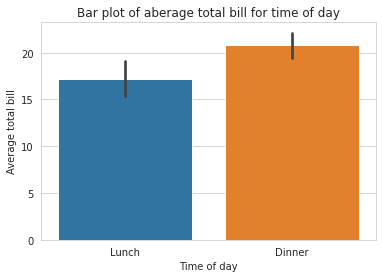

In [227]:
ax=plt.subplots()
ax=sns.barplot(x='time',y='total_bill', data=tips)
ax.set_title('Bar plot of aberage total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

6. 박스 그래프 그리기: 최솟값 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현: boxplot

Text(0, 0.5, 'Total Bill')

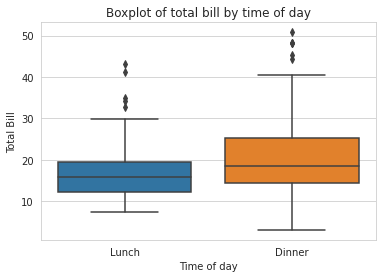

In [228]:
ax=plt.subplots()
ax=sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

7. 바이올린 그래프: violinplot

Text(0, 0.5, 'Total Bill')

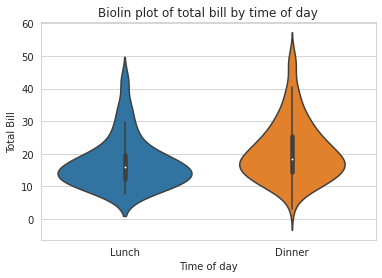

In [229]:
ax=plt.subplots()
ax=sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Biolin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

8. 관계 그래프: pairplot



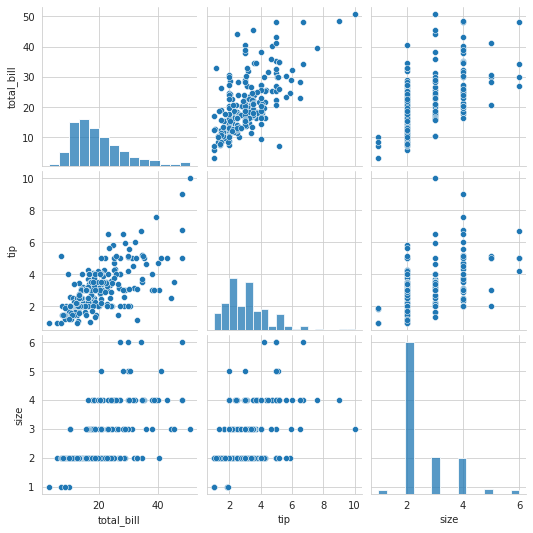

In [230]:
fig=sns.pairplot(tips)

9. 중복된 정보 대신 그려지는 위치를 직접 지정하여 원하는 그래프로 교체

map_upper: 대각선을 기준으로 위쪽에 그릴 그래프 지정

map_lower: 반대로 대각선 아래쪽

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

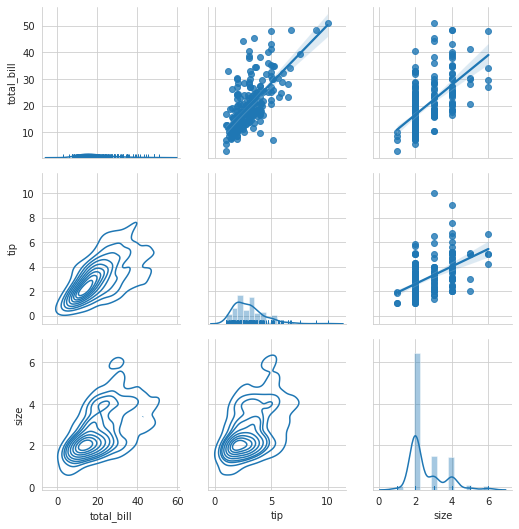

In [231]:
pair_grid=sns.PairGrid(tips)
pair_grid=pair_grid.map_upper(sns.regplot)
pair_grid=pair_grid.map_lower(sns.kdeplot)
pair_grid=pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

**다변량 그래프 그리기**


---
1. seaborn 라이브러리로 바이올린 그래프 그리기- 색상 추가

hue 인잣값으로 색상에 사용할 열 이름 추가


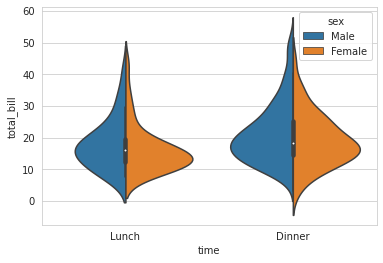

In [232]:
ax=plt.subplots()
ax=sns.violinplot(x='time',y='total_bill',hue='sex',data=tips, split=True)

2. 산점도, 관계 그래프 그리기 - 색상 추가

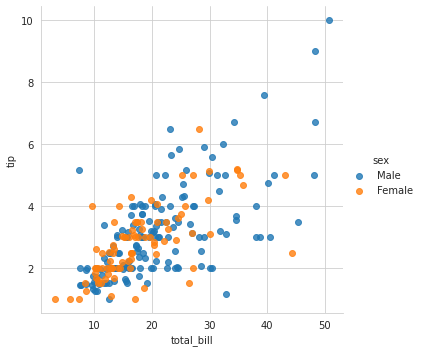

In [233]:
scatter=sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

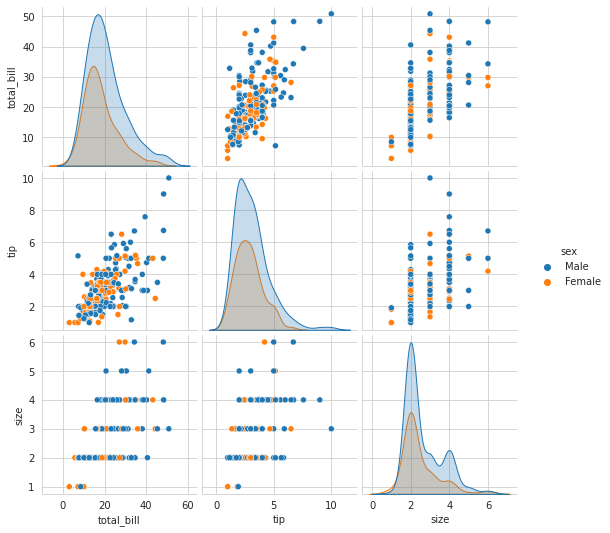

In [234]:
fig=sns.pairplot(tips, hue='sex')

3. 산점도 그래프의 크기와 모양 조절하기

점 크기: scatter_kws에 딕셔너리 형태로 인잣값 전달
크기만 조절: 's':tips['size']

In [176]:
#왜 오류가 뜨는지 모르겠음
scatter=sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s': (tips['size']*10)})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


<IPython.core.display.Javascript object>

ValueError: ignored

4. 산점도 그래프의 점을 다른 기호로 표현: markers 인잣값에 표현하고자 하는 기호 

ValueError: ignored

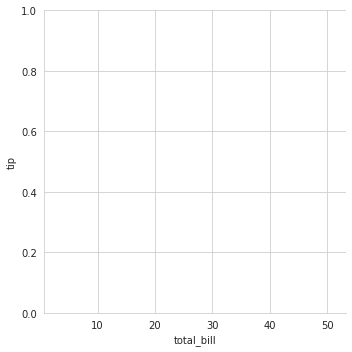

In [235]:
scaatter=sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', markers=['o','x'], scatter_kws={'s': tips['size']*10})

5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

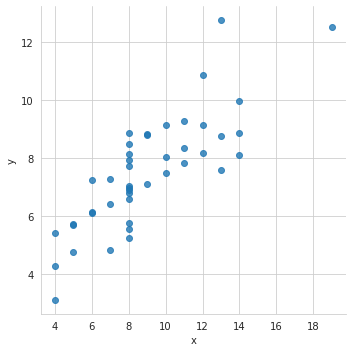

In [236]:
anscombe_plot=sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False)

6. 그룹별로 나누어 그리려면 col, col_warp 인자 사용

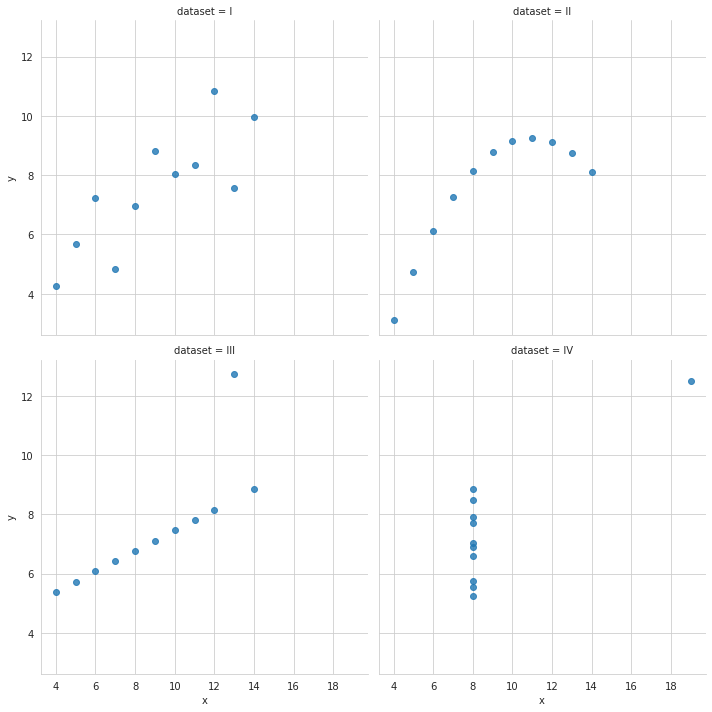

In [237]:
amscombe_plot= sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False,col='dataset', col_wrap=2)

(알아두면 좋아요!)

FacetGrid 클래스로 그룹별 그래프 그리기

facet의 map 메서드에 그래프의 종류, x 축으로 지정할 열 이름 전달


1. sns.distplot: 히스토그램, 밀집도, 양탄자

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

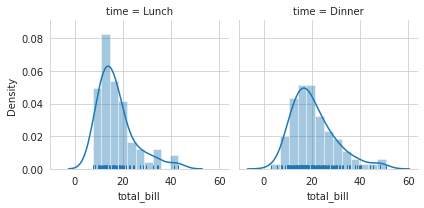

In [238]:
facet=sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

2. 다변량 그래프 plt.scatter

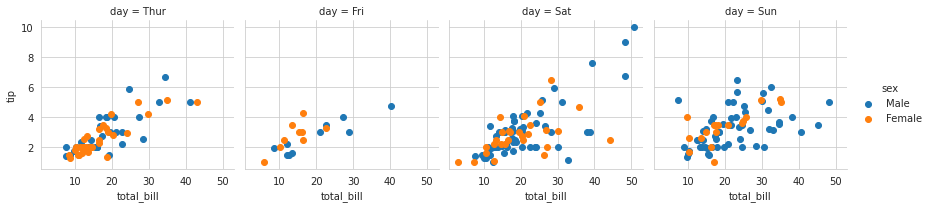

In [239]:
facet=sns.FacetGrid(tips, col='day', hue='sex')
facet=facet.map(plt.scatter, 'total_bill', 'tip')
facet=facet.add_legend()

3. 더 많은 변수 사용 time, smoker 열을 이용하여 산점도 그래프

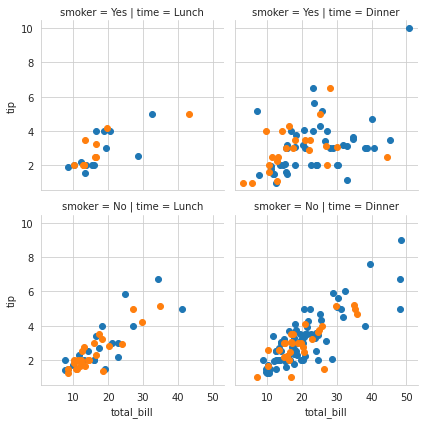

In [240]:
facet=sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

# **04-4 데이터프레임과 시리즈로 그래프 그리기**

---
데이터프레인과 시리즈로 그래프 그리기

1. 히스토그램


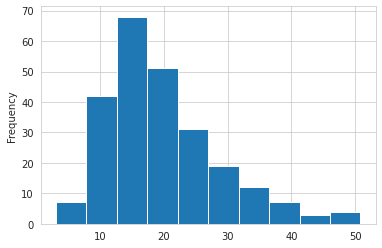

In [241]:
ax=plt.subplots()
ax=tips['total_bill'].plot.hist()

2. 투명도 조절: alpha, bins, ax 인자사용

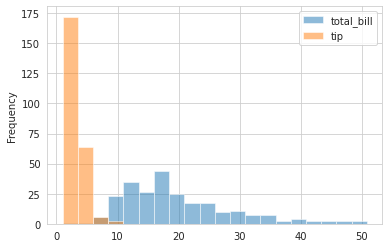

In [242]:
fig,ax=plt.subplots()
ax=tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

3. 


밀집도: kde

산점도 그래프: scatter

육각 그래프: hexbin

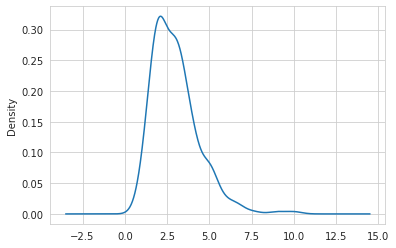

In [243]:
ax=plt.subplots()
ax=tips['tip'].plot.kde()

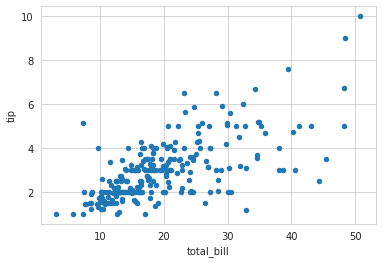

In [244]:
fig, ax=plt.subplots()
ax=tips.plot.scatter(x='total_bill',y='tip', ax=ax)

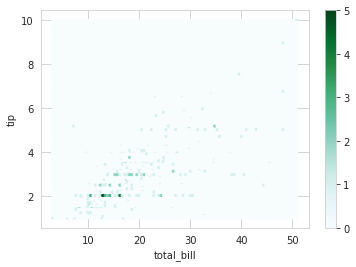

In [245]:
fig, ax=plt.subplots()
ax=tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

4. 육각 그래프 육각형 크기: gridsize

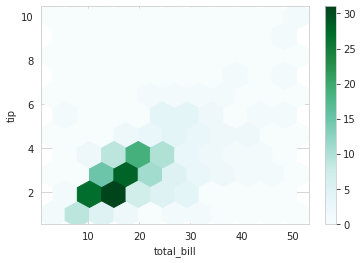

In [246]:
fig, ax=plt.subplots()
ax=tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

5. box 메서드

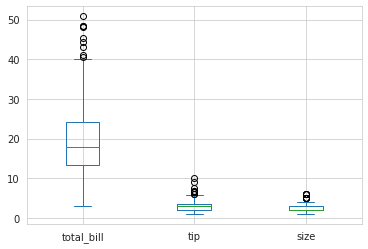

In [247]:
fig, ax=plt.subplots()
ax=tips.plot.box(ax=ax)

# **04-5 seaborn 라이브러리로 그래프 스타일 설정하기**


---

seaborn 라이브러리의 set_style 메서드 사용



**그래프에 스타일 적용하기**

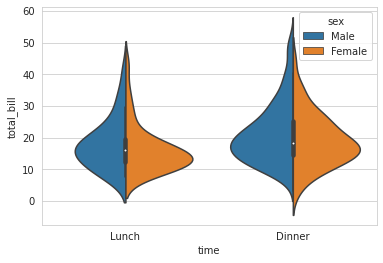

In [248]:
fig, ax=plt.subplots()
ax=sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

whitegrid로 스타일 설정 : 배경에 가로줄

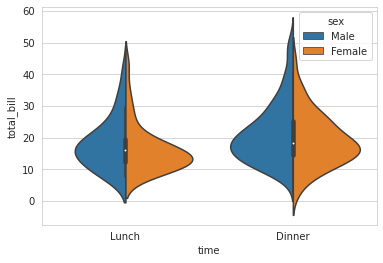

In [249]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax=sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

for 문을 이용하여 모든 스타일 적용

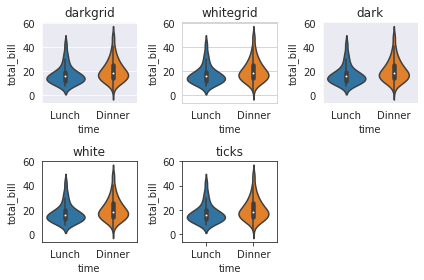

In [250]:
fig=plt.figure()

seaborn_styles=['darkgrid', 'whitegrid', 'dark', 'white','ticks']

for idx, style in enumerate(seaborn_styles):
  plot_position=idx+1
  with sns.axes_style(style):
    ax= fig.add_subplot(2,3,plot_position)
    violin=sns.violinplot(x='time',y='total_bill',data=tips,ax=ax)
    violin.set_title(style)

  fig.tight_layout()